<a href="https://colab.research.google.com/github/iqbalamo93/Logistic/blob/master/Logistic_Regressions_P1_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
url='https://dsserver-prod-resources-1.s3.amazonaws.com/20/admissions.csv'

In [0]:
df=pd.read_csv(url)

In [34]:
df.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


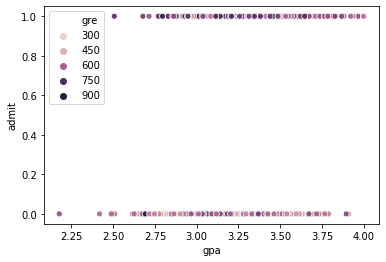

In [35]:
sns.scatterplot(x='gpa',y='admit',data=df,hue='gre')

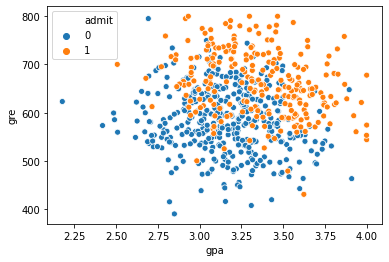

In [36]:
sns.scatterplot(x='gpa',y='gre',data=df,hue='admit')

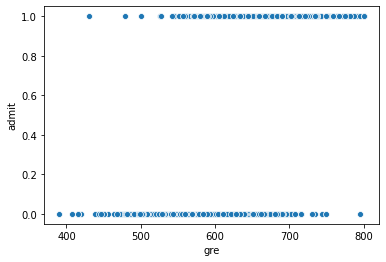

In [37]:
sns.scatterplot(x='gre',y='admit',data=df)

In linear regression, we used the linear function y = mx + b to represent the relationship between the independent variables and the dependent variable. In logistic regression, we use the logistic function, which is a version of the linear function that is adapted for classification.

Let's explore some of the logistic function's properties to better understand why it's useful for classification tasks. Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between 0 and 1, since the output represents a probability value. Note that the model can't output a negative value or it would violate this criteria.

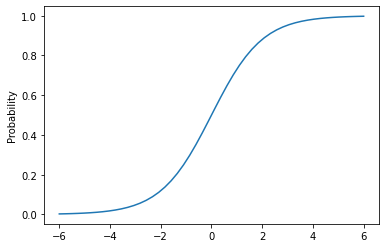

In [38]:
import numpy as np

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return 1 / (1 + np.exp(-x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()


In [0]:
X=df.drop('admit',axis=1).values
y=df['admit'].values

In [41]:
logistic_model.fit(X=X,y=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
logistic_model.predict_proba(X)

array([[0.79396098, 0.20603902],
       [0.46855616, 0.53144384],
       [0.97182838, 0.02817162],
       ...,
       [0.21907978, 0.78092022],
       [0.49828356, 0.50171644],
       [0.58865811, 0.41134189]])

In [43]:
probabilities = logistic_model.predict_proba(X)
# Probability that the row belongs to label `0`.
probabilities[:,0]
# Probabililty that the row belongs to label `1`.
probabilities[:,1]

array([0.20603902, 0.53144384, 0.02817162, 0.07801787, 0.06914569,
       0.0435784 , 0.57763799, 0.22236872, 0.44033194, 0.15245506,
       0.44241634, 0.32337971, 0.08584066, 0.03735439, 0.4271486 ,
       0.12385001, 0.05979471, 0.10012221, 0.09896851, 0.04712339,
       0.18304863, 0.03184246, 0.0135792 , 0.79051381, 0.00157982,
       0.54410387, 0.48584138, 0.70948641, 0.07604935, 0.06117645,
       0.04436531, 0.18378087, 0.36716034, 0.35560355, 0.05455452,
       0.42940714, 0.07111964, 0.42415239, 0.21397955, 0.21439177,
       0.0484898 , 0.10186677, 0.06670772, 0.2503748 , 0.30553006,
       0.35257868, 0.16220762, 0.00823978, 0.14084377, 0.23361799,
       0.0538861 , 0.19198959, 0.30368933, 0.08407138, 0.08613092,
       0.21363259, 0.0342332 , 0.18449876, 0.05273005, 0.1085407 ,
       0.43396219, 0.17051122, 0.0183063 , 0.18892156, 0.70601126,
       0.52322373, 0.14402158, 0.01319884, 0.24087351, 0.25672627,
       0.08016425, 0.15046678, 0.39950494, 0.34268446, 0.34405

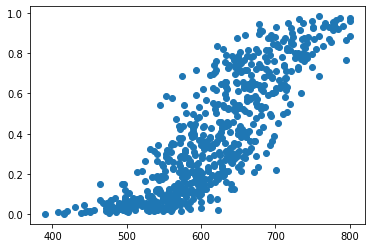

In [44]:
plt.scatter(df["gre"], probabilities[:,1])

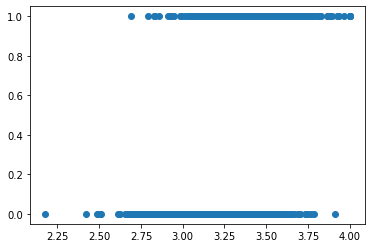

In [45]:
fitted_labels = logistic_model.predict(X)
plt.scatter(df["gpa"], fitted_labels)

Only with one feature


In [0]:
X=df.drop(['admit','gre'],axis=1).values
y=df['admit'].values

In [0]:
logistic_model = LogisticRegression()
logistic_model.fit(X=X, y=y)
pred_probs = logistic_model.predict_proba(X)
Predictions = logistic_model.predict(X)

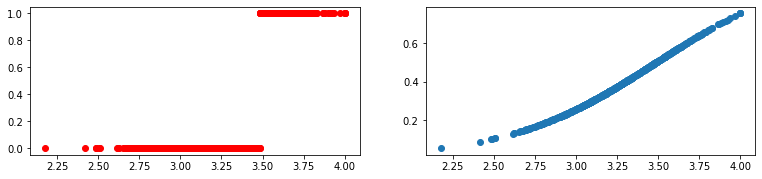

In [48]:
Figure = plt.figure(figsize=(13,6))
ax1 = Figure.add_subplot(2,2,1)#How many plot,in how many colmns,thsi one is?
ax2 = Figure.add_subplot(2,2,2)
ax1.scatter(df["gpa"], Predictions, c='red')
ax2.scatter(df["gpa"], pred_probs[:,1])

In [0]:
df['Predictions']=Predictions

In [50]:
df['Predictions'].value_counts()

0    507
1    137
Name: Predictions, dtype: int64

In [51]:
df['admit'].value_counts()

0    400
1    244
Name: admit, dtype: int64

In [52]:
df["actual_label"] = df["admit"]
matches = (df["Predictions"] == df["actual_label"])
correct_predictions = df[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(df)
print(accuracy)

   admit       gpa         gre  Predictions  actual_label
0      0  3.177277  594.102992            0             0
1      0  3.412655  631.528607            0             0
2      0  2.728097  553.714399            0             0
3      0  3.093559  551.089985            0             0
4      0  3.141923  537.184894            0             0
0.6847826086956522


In [53]:
true_positive_filter = (df["Predictions"] == 1) & (df["actual_label"] == 1)
true_positives = len(df[true_positive_filter])

true_negative_filter = (df["Predictions"] == 0) & (df["actual_label"] == 0)
true_negatives = len(df[true_negative_filter])

print(true_positives)
print(true_negatives)

89
352


In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df["actual_label"] ,df["Predictions"]))
print(confusion_matrix(df["actual_label"] ,df["Predictions"]))


              precision    recall  f1-score   support

           0       0.69      0.88      0.78       400
           1       0.65      0.36      0.47       244

    accuracy                           0.68       644
   macro avg       0.67      0.62      0.62       644
weighted avg       0.68      0.68      0.66       644

[[352  48]
 [155  89]]


In [55]:
400/644

0.6211180124223602

In [56]:
(352+89)/644 # Accuracy 

0.6847826086956522

In [57]:
352/(352+155) #Percision

0.6942800788954635

In [59]:
352/(352+48)#Recall,TPR,Sensitivity 
#How effective is this model at identifying positive outcomes?

0.88

In [60]:
155+89

244

In [61]:
#specificity ,TNR,How effective is this model at identifying negative outcomes?
244/(244+155)

0.6115288220551378

In [0]:
tn, fp, fn, tp = confusion_matrix(df["actual_label"] ,df["Predictions"]).ravel()

In [64]:
tn, fp, fn, tp

(352, 48, 155, 89)